# Week 7 — Text, Labels, & Tables (Illustration)
*DATS 2102: Data Visualization*

Goals:
- Practice **direct labeling** instead of legends.
- Add **annotations** (callouts, arrows) and **target bands**.
- Format a **companion table** for precision and readability.

**Rule for charts in this notebook:** Use **matplotlib**, one chart per cell, and do **not** set custom colors.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## 1) Direct labels on a line chart

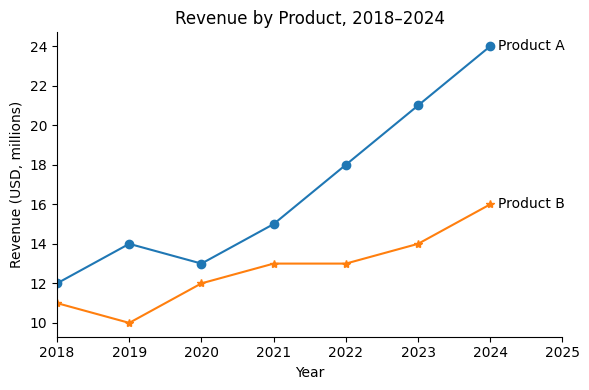

In [10]:
x = np.arange(2018, 2025)
A = np.array([12, 14, 13, 15, 18, 21, 24])
B = np.array([11, 10, 12, 13, 13, 14, 16])
fig, ax = plt.subplots()
ax.plot(x, A, marker='o')
ax.plot(x, B, marker='*')
ax.text(x[-1] + 0.1, A[-1], 'Product A', va='center')
ax.text(x[-1] + 0.1, B[-1], 'Product B', va='center')
ax.set_xlim(x[0], x[-1] + 1)
ax.set_title('Revenue by Product, 2018–2024')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue (USD, millions)')
plt.tight_layout()
plt.show()

## 2) Horizontal bars with value labels (legend-free)

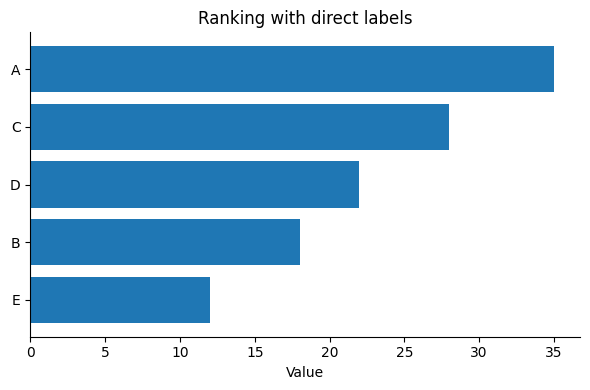

In [13]:
labels = ['A','B','C','D','E']
values = np.array([35, 18, 28, 22, 12])
order = np.argsort(values)
fig, ax = plt.subplots()
y = np.arange(len(labels))
ax.barh(y, values[order])

for i, v in enumerate(values[order]):
    pass
    # ax.text(v + 0.5, i, f'{v}', va='center')

ax.set_yticks(y)
ax.set_yticklabels(np.array(labels)[order])
ax.set_xlabel('Value')
ax.set_title('Ranking with direct labels')
plt.tight_layout()
plt.show()

## 3) Callout + target band (annotation toolkit)

In [ ]:
np.random.seed(0)
x = np.arange(1, 13)
y = np.cumsum(np.random.randn(12)) + 10
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')
ax.axhspan(10, 12, alpha=0.15)
# ax.axhspan(10, 12, 0, 0.5, alpha=0.15)

ax.text(12.2, 11, 'Target band', va='center')
i_max = int(np.argmax(y))
ax.annotate('Local peak', xy=(x[i_max], y[i_max]),
            xytext=(x[i_max] + 0.8, y[i_max] + 1.5),
            arrowprops=dict(arrowstyle='->', lw=1))
ax.set_title('Progress vs Target (Monthly)')
ax.set_xlabel('Month')
ax.set_ylabel('Score')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np, matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, y)

# π label on the x-axis
ax.text(np.pi, -1.15, r'$\pi$', ha='center', va='top')

# E = m c^2 callout with an arrow
ax.annotate(r'$E = m c^2$',
            xy=(np.pi/2, 1),                # point to annotate
            xytext=(np.pi/2, 1.2),      # text position
            arrowprops=dict(arrowstyle='->', lw=1),
            bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='0.8'))

# Title mixing text and math
ax.set_title(r'Sine wave: $y = \sin(x)$')

ax.set_xlabel('x')
ax.set_ylabel('Amplitude')

ax.set_title(r'Normal PDF: $\mu=0,\ \sigma=1$')
ax.set_xlabel(r'$t$ (s)')
ax.set_ylabel(r'Acceleration $a\ ( \mathrm{m\,s^{-2}} )$')
ax.plot(x, y, label=r'$\sin(x)$')
ax.legend()

# # Inline pi approximations
# ax.text(0.1, 0.9, r'$\pi \approx 3.14159$', transform=ax.transAxes)

# # Superscripts & subscripts
# ax.text(0.1, 0.8, r'$x_i^2 + y_j^2$', transform=ax.transAxes)

# # Scientific notation with units (upright)
# ax.text(0.1, 0.7, r'$1.2\times10^{3}\ \mathrm{kg\,m\,s^{-2}}$', transform=ax.transAxes)

# # Multiplication dot (instead of 'x')
# ax.text(0.1, 0.6, r'$E = m \cdot c^2$', transform=ax.transAxes)


plt.tight_layout()
plt.show()


## 4) Label collision strategy (cluster/centroid labeling)

In [ ]:
rng = np.random.default_rng(0)
A = rng.normal(loc=(50, 1500), scale=(4, 80), size=(40, 2))
B = rng.normal(loc=(55, 1700), scale=(4, 80), size=(40, 2))
C = rng.normal(loc=(60, 1900), scale=(4, 80), size=(40, 2))

fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], s=10)
ax.scatter(B[:,0], B[:,1], s=10)
ax.scatter(C[:,0], C[:,1], s=10)

centroids = [A.mean(axis=0), B.mean(axis=0), C.mean(axis=0)]
for i, (cx, cy) in enumerate(centroids, start=1):
    ax.text(cx + 0.8, cy, f'Cluster {i} (avg)')
ax.set_title('Avoid over-labeling: label clusters')
ax.set_xlabel('X metric'); ax.set_ylabel('Y metric')

plt.tight_layout()
plt.show()

## 5) Companion table (alignment, consistency, deltas)

In [2]:
sales = pd.DataFrame({
    'Region':['Northeast','Midwest','South','West'],
    '2023':[12_530_000, 9_820_000, 14_200_000, 11_340_000],
    '2024':[13_480_000, 10_050_000, 15_120_000, 12_310_000]
})
sales['Δ'] = sales['2024'] - sales['2023']
sales['% Change'] = sales['Δ'] / sales['2023']
sales = sales.sort_values('2024', ascending=False).reset_index(drop=True)
sales

,Region,2023,2024,Δ,% Change
0,South,14200000,15120000,920000,0.064789
1,Northeast,12530000,13480000,950000,0.075818
2,West,11340000,12310000,970000,0.085538
3,Midwest,9820000,10050000,230000,0.023422


In [9]:
styled = (
    sales.style
    .format({'2023': '{:,.0f}', '2024': '{:,.0f}', 'Δ': '{:+,.0f}', '% Change': '{:+.1%}'})
    .set_caption('Regional Sales Summary')
    .set_table_styles([
        {"selector": "th", "props": [("text-align","center")]}, ##header cells
        {"selector": "td", "props": [("text-align","right")]},

        # {"selector":"tbody tr:nth-child(even)", "props":[("background-color", "#f5f5f5")]},
        # {"selector":"tbody tr:nth-child(odd)",  "props":[("background-color", "blue")]}
        
        ]) ##data cells
        
)
styled

,Region,2023,2024,Δ,% Change
0,South,"14,200,000","15,120,000","+920,000",+6.5%
1,Northeast,"12,530,000","13,480,000","+950,000",+7.6%
2,West,"11,340,000","12,310,000","+970,000",+8.6%
3,Midwest,"9,820,000","10,050,000","+230,000",+2.3%


## 6) Exporting a figure with a source footer

In [ ]:
fig, ax = plt.subplots()
ax.bar(['Q1','Q2','Q3','Q4'], [10, 13, 12, 15])
ax.set_title('Quarterly Output, 2024')
ax.set_ylabel('Units')
fig.text(0.99, 0.01, 'Source: Example Co., 2024', ha='right', va='bottom')
out = 'week7_bar_with_source.png'
plt.tight_layout(); 
plt.savefig(out, dpi=200); 
plt.show()
print('Saved:', out)

## 7) Bad → Good Makeovers
Practical before/after examples focusing on titles, labels, annotations, and tables.
**Rule reminder:** one chart per cell; no custom colors; matplotlib only.

### 7.1 Bars — From legend soup to direct labels (**Bad**)

In [ ]:
import numpy as np, matplotlib.pyplot as plt
labels = ['North', 'South', 'East', 'West']
values = [12530, 14200, 11340, 13480]
fig, ax = plt.subplots()
y = np.arange(len(labels))
ax.barh(y, values, label='2024')
ax.legend(loc='upper right')
ax.set_title('Sales')
ax.set_yticks(y)
ax.set_yticklabels(labels)
plt.show()

**Fixes:** message-first title, sort for scanning, direct value labels, unit in axis, remove legend. (**Good**)

In [ ]:
import numpy as np, matplotlib.pyplot as plt
labels = ['North', 'South', 'East', 'West']
values = [12530, 14200, 11340, 13480]
order = np.argsort(values)
vals = np.array(values)[order]
labs = np.array(labels)[order]
fig, ax = plt.subplots()
y = np.arange(len(labs))
ax.barh(y, vals)
for i, v in enumerate(vals):
    ax.text(v + max(vals)*0.02, i, f'{v:,.0f}', va='center')
ax.set_yticks(y); ax.set_yticklabels(labs)
ax.set_xlabel('Sales (USD)')
ax.set_title('South leads 2024 regional sales')
plt.tight_layout()
plt.show()

### 7.2 Line — From vague to guided reading (**Bad**)

In [ ]:
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)
x = np.arange(1,13)
y = np.cumsum(np.random.randn(12)) + 10
plt.figure()
plt.plot(x, y)
plt.title('Scores')
plt.show()

**Fixes:** explicit timeframe, unit/axis label, target band, callout of peak. (**Good**)

In [ ]:
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)
x = np.arange(1,13)
y = np.cumsum(np.random.randn(12)) + 10
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')

ax.axhspan(10, 12, alpha=0.15)
ax.text(12.2, 11, 'Target band', va='center')

i_max = int(np.argmax(y))
ax.annotate('Peak', xy=(x[i_max], y[i_max]),
            xytext=(x[i_max]+0.8, y[i_max]+1.5),
            arrowprops=dict(arrowstyle='->', lw=1))

ax.set_title('Monthly Score vs Target (Jan–Dec 2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Score')
plt.tight_layout()
plt.show()

### 7.3 Table — From messy to readable (**Bad**)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Region':['Northeast','Midwest','South','West'],
    '2023':[12530000, 9820000, 14200000, 11340000],
    '2024':[13480000, 10050000, 15120000, 12310000]
})
df['delta']=df['2024']-df['2023']
df['pct']=df['delta']/df['2023']
df

**Fixes:** sorted for the task, units/precision, aligned numbers, Δ and % change columns, caption. (**Good**)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Region':['Northeast','Midwest','South','West'],
    '2023':[12_530_000, 9_820_000, 14_200_000, 11_340_000],
    '2024':[13_480_000, 10_050_000, 15_120_000, 12_310_000]
})
df['Δ'] = df['2024'] - df['2023']
df['% Change'] = df['Δ'] / df['2023']
df = df.sort_values('2024', ascending=False).reset_index(drop=True)
styled = (
    df.style
    .format({'2023':'{:,.0f}', '2024':'{:,.0f}', 'Δ':'{:+,.0f}', '% Change':'{:+.1%}'})
    .set_caption('Regional Sales, 2023–2024')
    .set_table_styles([
        {"selector":"th", "props":[("text-align","center")]},
        {"selector":"td", "props":[("text-align","right")]}
    ])
)
styled

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Region':['Northeast','Midwest','South','West'],
    '2023':[12_530_000, 9_820_000, 14_200_000, 11_340_000],
    '2024':[13_480_000, 10_050_000, 15_120_000, 12_310_000]
})
df['\u0394'] = df['2024'] - df['2023']
df['% Change'] = df['\u0394'] / df['2023']
df = df.sort_values('2024', ascending=False).reset_index(drop=True)
print(df.head())
styled = (
    df.style
    .format({'2023':'{:,.0f}', '2024':'{:,.0f}', r'\u039':'{:+,.0f}', '% Change':'{:+.1%}'})
    .set_caption('Regional Sales, 2023–2024')
    .set_table_styles([
        {"selector":"th", "props":[("text-align","center")]},
        {"selector":"td", "props":[("text-align","right")]}
    ])
)
styled